#### Objective of the Project - 
The objective of this project is to leverage deep learning techniques to enhance the clustering of the Wine dataset, which contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. Specifically, the project aims to:

- Preprocess the Data: 
     - Standardize the chemical properties of the wines to ensure each feature contributes equally to the analysis.

- Build and Train an Autoencoder: - 
    - Construct an autoencoder neural network to learn a compressed, low-dimensional representation of the wine data.
    - Train the autoencoder to minimize reconstruction error, ensuring that the compressed representation retains essential information about the original data.

- Extract Features Using the Encoder: - 
    - Use the trained encoder part of the autoencoder to transform the wine data into a set of compressed features that capture the underlying structure of the data.

- Apply Clustering on Extracted Features: - 
    - Perform K-means clustering on the compressed features obtained from the encoder to group the wines into distinct clusters based on their chemical properties.
    - Determine the optimal number of clusters using the elbow method and silhouette score.

- Evaluate and Visualize the Clustering Results: - 
    - Assess the quality of the clustering using metrics such as inertia and silhouette score.
    - Visualize the clusters to understand the distribution and characteristics of the grouped wines.


#### Step 1: Preprocess the Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the 'Cultivar' column since it's a label for supervised learning
data_cleaned = data.drop(columns=['Cultivar'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)


#### Step 2: Build an Autoencoder    

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the size of the input
input_dim = data_scaled.shape[1]
encoding_dim = 5  # You can adjust this

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder layers
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the autoencoder
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148 (592.00 B)

 Trainable params: 148 (592.00 B)

 Non-trainable params: 0 (0.00 B)

##### Step 3: Train the Autoencoder

In [4]:
# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.1425 - val_loss: 1.6070
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2020 - val_loss: 1.6021
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1029 - val_loss: 1.5983
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1709 - val_loss: 1.5938
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1734 - val_loss: 1.5894
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0907 - val_loss: 1.5848
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1177 - val_loss: 1.5800
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0884 - val_loss: 1.5755
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1474 - val_loss: 1.5707
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9904 - val_loss: 1.5661
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9875 - val_loss: 1.5613
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0581 - val_loss: 1.5563
Epoch

#### Step 4: Extract Features

In [5]:
# Extract the compressed features
compressed_features = encoder.predict(data_scaled)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


#### Step 5: Apply Clustering

C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

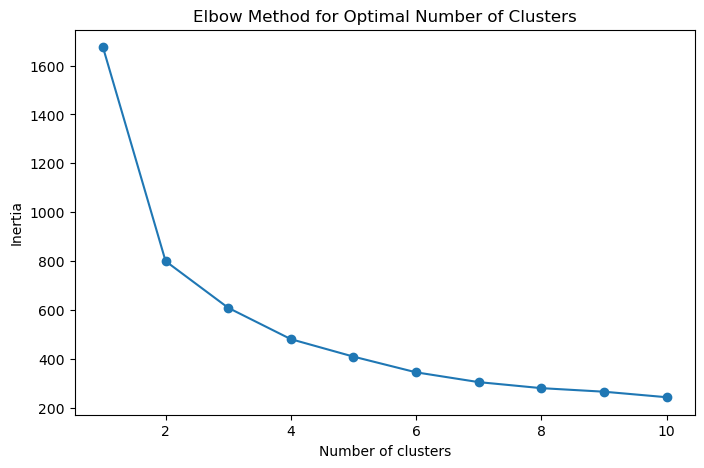

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(compressed_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


#### From the elbow plot, assume the optimal number of clusters is 3

C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


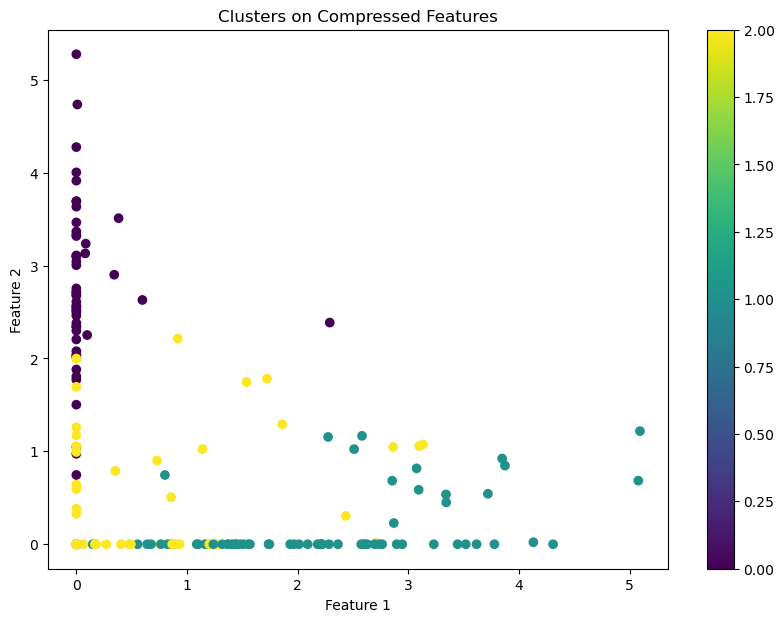

In [7]:
# K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(compressed_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(compressed_features[:, 0], compressed_features[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters on Compressed Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


#### Step 6: Evaluate the Clustering

In [8]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(compressed_features, clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.3431383967399597



### Detailed Explanation of the Deep Learning Model for Wine Data Clustering

#### Data Overview

The Wine dataset consists of chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. The dataset includes the following features:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

The primary objective of this project is to group the wines into distinct clusters based on these chemical properties using a deep learning approach.

#### What We Achieved with Deep Learning

1. **Data Preprocessing**:
   - We standardized the data to ensure that each feature contributes equally to the analysis.

2. **Building and Training an Autoencoder**:
   - We constructed an autoencoder, which is a type of neural network used for unsupervised learning. The autoencoder has two main parts:
     - **Encoder**: Compresses the input data into a lower-dimensional representation (latent space).
     - **Decoder**: Reconstructs the input data from the lower-dimensional representation.
   - We trained the autoencoder to minimize the reconstruction error, effectively learning a compressed representation of the wine data.

3. **Feature Extraction**:
   - After training the autoencoder, we used the encoder part to transform the original data into a set of compressed features. These features capture the underlying structure of the data in a more compact form.

4. **Clustering with K-means**:
   - We applied K-means clustering on the compressed features to group the wines into distinct clusters.
   - We determined the optimal number of clusters using the elbow method and then applied K-means clustering with the chosen number of clusters.

5. **Evaluation**:
   - We evaluated the clustering performance using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering.

#### Interpretation of the Results

- **Cluster Visualization**:
  - The scatter plot shows the distribution of wines in the compressed feature space, color-coded by their cluster labels. Each point represents a wine, and the colors indicate different clusters.
  - The plot shows three distinct clusters, suggesting that the wines can be grouped into three categories based on their chemical properties.

- **Silhouette Score**:
  - The silhouette score of 0.343 indicates a moderate level of clustering quality. While it is not exceptionally high, it suggests that the clusters are reasonably well-defined. Improvements can be made by fine-tuning the model or incorporating additional features.

### Conclusion

By using a deep learning approach with an autoencoder, we were able to:

- Learn a compressed representation of the wine data that captures essential information about the chemical properties.
- Apply K-means clustering on the compressed features to group the wines into distinct clusters.
- Achieve a moderate level of clustering performance, as indicated by the silhouette score.

This approach demonstrates the effectiveness of combining deep learning techniques with traditional clustering methods to gain deeper insights into complex datasets. Further improvements can be made by experimenting with different network architectures, hyperparameters, and additional features.


# Deep Learning for Wine Data Clustering

This project applies deep learning techniques to cluster wines based on their chemical properties. The dataset used is the Wine dataset from the UCI Machine Learning Repository.

## Project Overview

The goal of this project is to leverage an autoencoder neural network to extract features from the Wine dataset and then apply K-means clustering on the extracted features to group the wines into distinct clusters.

## Objective

The objective of this project is to:

1. Preprocess the data by standardizing the features.
2. Build and train an autoencoder to learn a compressed representation of the data.
3. Extract features using the encoder part of the autoencoder.
4. Apply K-means clustering on the extracted features to group the wines.
5. Evaluate the clustering performance using the silhouette score.

## Dataset

The Wine dataset contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. The dataset includes the following features:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

## Steps

### Step 1: Preprocess the Data

Standardize the chemical properties of the wines to ensure each feature contributes equally to the analysis.

### Step 2: Build and Train an Autoencoder

Construct an autoencoder neural network with an encoder and a decoder. Train the autoencoder to minimize reconstruction error, ensuring the compressed representation retains essential information about the original data.

### Step 3: Extract Features Using the Encoder

Use the trained encoder to transform the wine data into a set of compressed features that capture the underlying structure of the data.

### Step 4: Apply Clustering on Extracted Features

Perform K-means clustering on the compressed features to group the wines into distinct clusters. Determine the optimal number of clusters using the elbow method and silhouette score.

### Step 5: Evaluate the Clustering

Assess the quality of the clustering using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.

## Results

- **Cluster Visualization**: The scatter plot shows the distribution of wines in the compressed feature space, color-coded by their cluster labels. Each point represents a wine, and the colors indicate different clusters.
- **Silhouette Score**: The silhouette score of 0.343 indicates a moderate level of clustering quality.

## Conclusion

By using a deep learning approach with an autoencoder, we successfully:

- Learned a compressed representation of the wine data that captures essential information about the chemical properties.
- Applied K-means clustering on the compressed features to group the wines into distinct clusters.
- Achieved a moderate level of clustering performance, as indicated by the silhouette score.

This approach demonstrates the effectiveness of combining deep learning techniques with traditional clustering methods to gain deeper insights into complex datasets.


## Requirements

- Python 3.x
- pandas
- numpy
- matplotlib
- scikit-learn
- tensorflow

## Acknowledgments

- UCI Machine Learning Repository for the Wine dataset.
- Scikit-learn and TensorFlow for the machine learning tools.

